In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

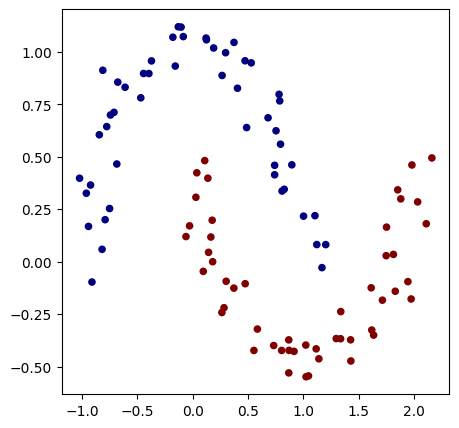

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [13]:
model = MLP(2, [4, 4, 1])

In [14]:
# loss function
def loss_func(batch_size=None):
    
    #DataLoader :)
    Xb, yb = X, y
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

In [17]:
for k in range(100):
  
    # forward pass
    loss, acc = loss_func()
    
    # backward pass
    model.zero_grad()
    loss.backward()
      
    # update
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 10 == 0:
        print(f"step {k} loss {loss.data}, accuracy {acc*100}%")

step 0 loss 0.2341644117580699, accuracy 90.0%
step 10 loss 0.23391862490491505, accuracy 90.0%
step 20 loss 0.21484571448647294, accuracy 89.0%
step 30 loss 0.20130184315474972, accuracy 92.0%
step 40 loss 0.1078425232525347, accuracy 96.0%
step 50 loss 0.0892957391175585, accuracy 97.0%
step 60 loss 0.07911696764910385, accuracy 97.0%
step 70 loss 0.04538768637170856, accuracy 99.0%
step 80 loss 0.0418569769681254, accuracy 99.0%
step 90 loss 0.03336698003352763, accuracy 100.0%


(-1.548639298268643, 1.951360701731357)

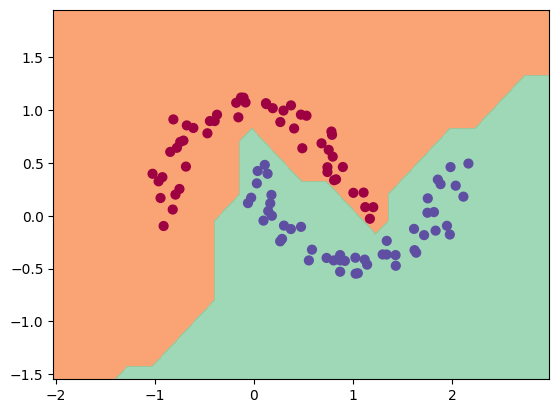

In [18]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())